In [23]:
import csv

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [3]:
def read_data(filename):
    out = []
    with open(filename) as file:
        start_fill = False
        for line in csv.reader(file):
            if start_fill:
                out.append(float(line[2]))
            if line[0] == "Sample #":
                start_fill = True
    return np.array(out)

WS_50  = read_data("../calibration-data/WS_lpm50.csv")
WS_60  = read_data("../calibration-data/WS_lpm60.csv")
WS_70  = read_data("../calibration-data/WS_lpm70.csv")
WS_80  = read_data("../calibration-data/WS_lpm80.csv")
WS_90  = read_data("../calibration-data/WS_lpm90.csv")
WS_100 = read_data("../calibration-data/WS_lpm100.csv")

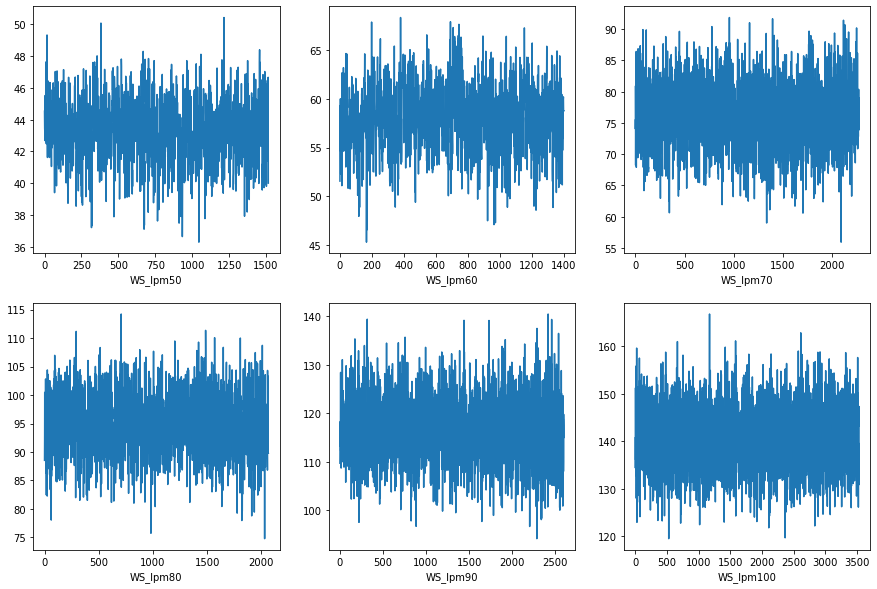

In [9]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
ax1.plot(WS_50); ax1.set_xlabel("WS_lpm50")
ax2.plot(WS_60); ax2.set_xlabel("WS_lpm60")
ax3.plot(WS_70); ax3.set_xlabel("WS_lpm70")
ax4.plot(WS_80); ax4.set_xlabel("WS_lpm80")
ax5.plot(WS_90); ax5.set_xlabel("WS_lpm90")
ax6.plot(WS_100); ax6.set_xlabel("WS_lpm100");

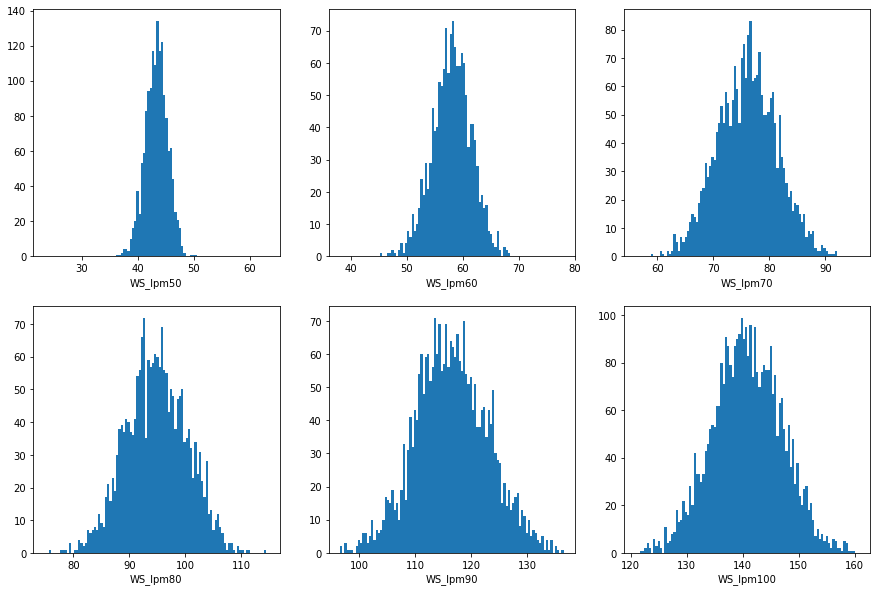

In [11]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
ax1.hist(WS_50, bins=100, range=(np.mean(WS_50) - 20, np.mean(WS_50) + 20)); ax1.set_xlabel("WS_lpm50")
ax2.hist(WS_60, bins=100, range=(np.mean(WS_60) - 20, np.mean(WS_60) + 20)); ax2.set_xlabel("WS_lpm60")
ax3.hist(WS_70, bins=100, range=(np.mean(WS_70) - 20, np.mean(WS_70) + 20)); ax3.set_xlabel("WS_lpm70")
ax4.hist(WS_80, bins=100, range=(np.mean(WS_80) - 20, np.mean(WS_80) + 20)); ax4.set_xlabel("WS_lpm80")
ax5.hist(WS_90, bins=100, range=(np.mean(WS_90) - 20, np.mean(WS_90) + 20)); ax5.set_xlabel("WS_lpm90")
ax6.hist(WS_100, bins=100, range=(np.mean(WS_100) - 20, np.mean(WS_100) + 20)); ax6.set_xlabel("WS_lpm100");

In [43]:
xs = [50, 60, 70, 80, 90, 100]
ys = [np.mean(WS_50), np.mean(WS_60), np.mean(WS_70), np.mean(WS_80), np.mean(WS_90), np.mean(WS_100)]
es = [np.std(WS_50)/np.sqrt(len(WS_50)), np.std(WS_60)/np.sqrt(len(WS_60)), np.std(WS_70)/np.sqrt(len(WS_70)), np.std(WS_80)/np.sqrt(len(WS_80)), np.std(WS_90)/np.sqrt(len(WS_90)), np.std(WS_100)/np.sqrt(len(WS_100))]
sigma = [np.std(WS_50), np.std(WS_60), np.std(WS_70), np.std(WS_80), np.std(WS_90), np.std(WS_100)]

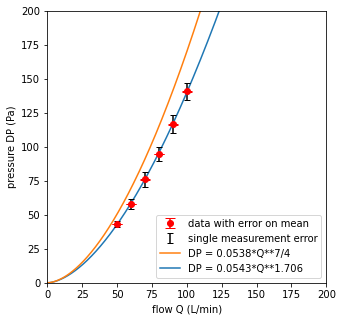

In [66]:
def baseline(x, constant, power):
    return constant * x**power

(baseline_constant, baseline_power), covariance = scipy.optimize.curve_fit(baseline, xs, ys, sigma=es)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
curve_xs = np.linspace(0, 200, 500)
h2, = ax.plot(curve_xs, baseline(curve_xs, baseline_constant, baseline_power), label="DP = {:.4f}*Q**{:.4g}".format(baseline_constant, baseline_power))
h1, = ax.plot(curve_xs, baseline(curve_xs, 0.0538, 7/4), label="DP = 0.0538*Q**7/4")
h00 = ax.errorbar(xs, ys, yerr=sigma, fmt="none", label="single measurement error", c="black", capsize=3)
h0 = ax.errorbar(xs, ys, yerr=es, fmt="o", label="data with error on mean", c="red", capsize=5)
ax.set_xlim(0, 200)
ax.set_ylim(0, 200)
ax.set_xlabel("flow Q (L/min)")
ax.set_ylabel("pressure DP (Pa)")
ax.legend(handles=[h0, h00, h1, h2])
fig.savefig("WS_lpm_calibration.pdf")